In [1]:
import torch
import numpy             as np
import matplotlib.pyplot as plt

from ipywidgets     import interact
from torch.optim    import Adam
from tqdm           import tqdm
from astropy        import constants, units
from p3droslo.model import TensorModel
from p3droslo.loss  import Loss, diff_loss
from p3droslo.lines import Line
from p3droslo.plot  import plot_cube_2D

from run_CO import frequencies, velocities, obs, run, init, fit, forward, forward_analytic_velo_and_T

/home/frederikd/.local/lib/python3.9/site-packages/astroquery/lamda/core.py:145: UserWarning: The first time a LAMDA function is called, it must assemble a list of valid molecules and URLs.  This list will be cached so future operations will be faster.
  warnings.warn("The first time a LAMDA function is called, it must "


You have selected line:
    CO(J=3-2)
Please check the properties that were inferred:
    Frequency         3.457959899e+11  Hz
    Einstein A coeff  2.497000000e-06  1/s
    Molar mass        28.0101          g/mol


In [2]:
line = Line('CO', 2)

You have selected line:
    CO(J=3-2)
Please check the properties that were inferred:
    Frequency         3.457959899e+11  Hz
    Einstein A coeff  2.497000000e-06  1/s
    Molar mass        28.0101          g/mol


In [3]:
img, loss = init()

In [4]:
model = TensorModel.load('models/model_3D_CO_all.h5')
model.info()

Variable key:              Free/Fixed:   Field:    Min:           Mean:          Max:
  beta                       Free          False    +1.000e+00     +1.000e+00     +1.000e+00
  log_CO                     Free          True     +1.474e+01     +1.599e+01     +2.303e+01
  log_T_in                   Free          False    +8.517e+00     +8.517e+00     +8.517e+00
  log_epsilon                Free          False    -6.931e-01     -6.931e-01     -6.931e-01
  log_v_in                   Free          False    +2.303e+00     +2.303e+00     +2.303e+00
  log_v_inf                  Fixed         False    +9.473e+00     +9.473e+00     +9.473e+00
  log_v_turbulence           Fixed         True     +5.011e+00     +5.011e+00     +5.011e+00
sizes: [7.46717267e+13 7.46169581e+13 7.36127621e+13]
shape: (64, 64, 64)


In [6]:
(model['log_CO']/np.log(10)).max()

tensor(10., dtype=torch.float64, grad_fn=<MaxBackward1>)

In [9]:
img = fit(loss, model, obs, N_epochs=5, lr=1.0e-1, w_rep=1.0e+0)
loss.renormalise_all()
loss.reset()

  0%|          | 0/5 [00:00<?, ?it/s]/home/frederikd/.local/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 5/5 [00:37<00:00,  7.42s/it]


100%|██████████| 3/3 [00:21<00:00,  7.20s/it]


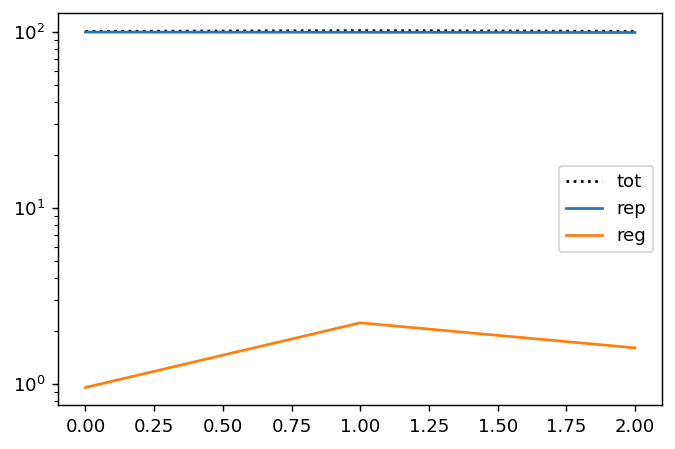

In [10]:
img = fit(loss, model, obs, N_epochs=3, lr=1.0e-1, w_rep=1.0e+2)
loss.plot()

100%|██████████| 50/50 [06:06<00:00,  7.33s/it]


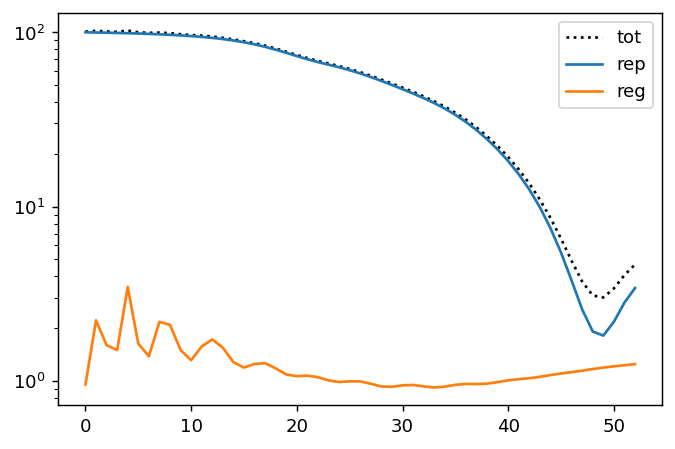

In [11]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+2)
loss.plot()

100%|██████████| 50/50 [06:02<00:00,  7.25s/it]


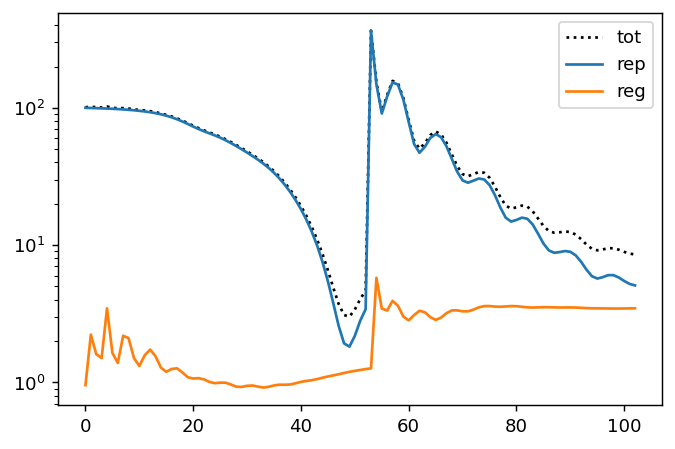

In [12]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+4)
loss.plot()

100%|██████████| 50/50 [05:49<00:00,  6.99s/it]


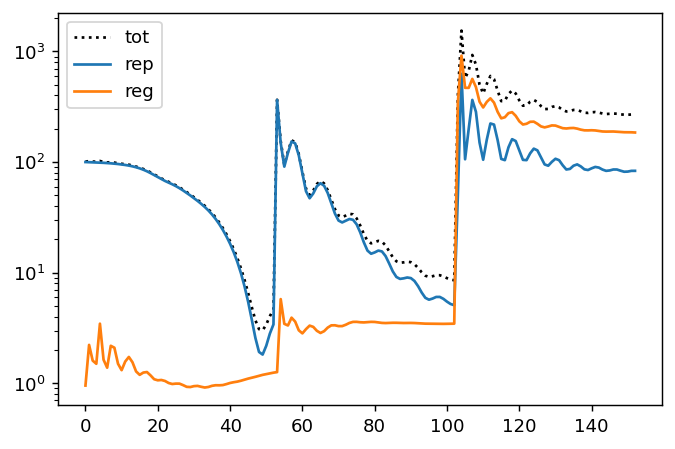

In [19]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+5, w_reg=1.0e+2)
loss.plot()

100%|██████████| 50/50 [05:23<00:00,  6.48s/it]


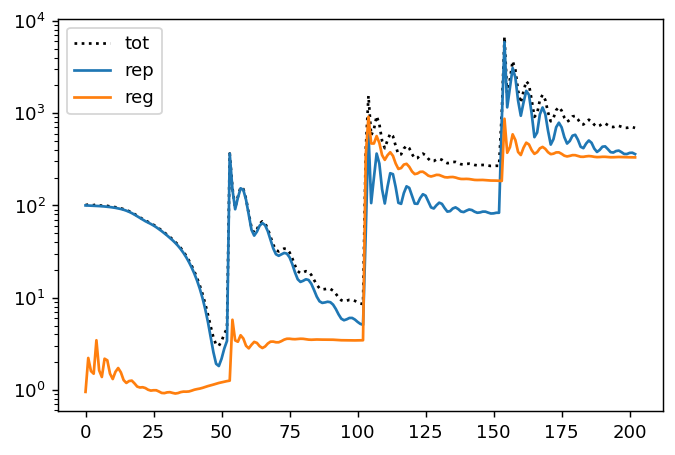

In [26]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+6, w_reg=1.0e+2)
loss.plot()

100%|██████████| 50/50 [05:36<00:00,  6.72s/it]


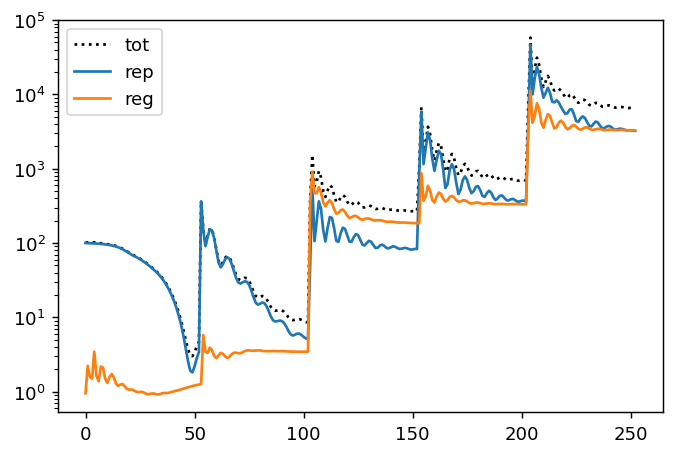

In [34]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+7, w_reg=1.0e+3)
loss.plot()

100%|██████████| 50/50 [05:36<00:00,  6.72s/it]


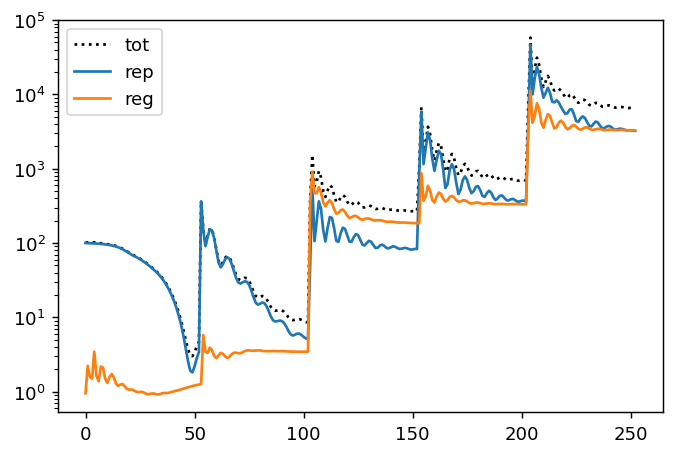

In [ ]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+7, w_reg=1.0e+3)
loss.plot()

100%|██████████| 50/50 [06:28<00:00,  7.77s/it]


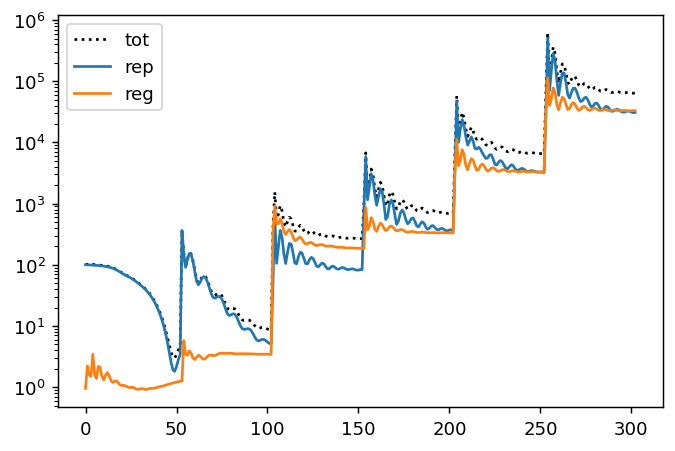

In [42]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+8, w_reg=1.0e+4)
loss.plot()

100%|██████████| 50/50 [06:31<00:00,  7.82s/it]


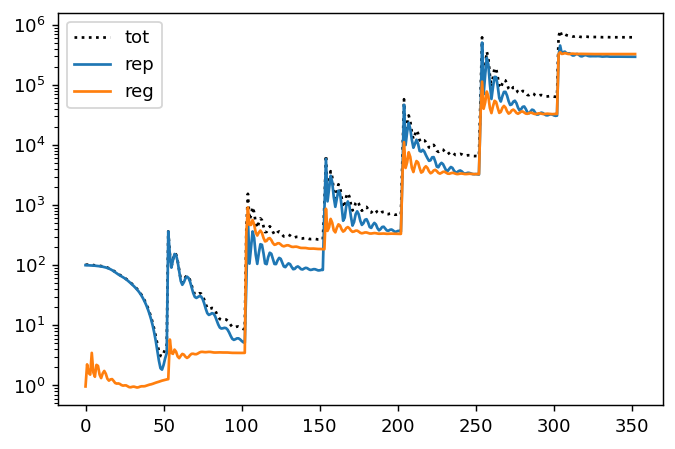

In [51]:
img = fit(loss, model, obs, N_epochs=50, lr=2.0e-2, w_rep=1.0e+9, w_reg=1.0e+5)
loss.plot()

In [ ]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-2, w_rep=1.0e+9, w_reg=1.0e+5)
loss.plot()

100%|██████████| 50/50 [06:31<00:00,  7.82s/it]


In [43]:
model.save('models/model_3D_CO_all.h5')

In [52]:
plot_cube_2D(model['log_CO'].T)

interactive(children=(IntSlider(value=31, description='z', max=63), Output()), _dom_classes=('widget-interact'…

<function p3droslo.plot.plot_cube_2D.<locals>.plot(z)>

In [53]:
plot_cube_2D(model['log_CO'])

interactive(children=(IntSlider(value=31, description='z', max=63), Output()), _dom_classes=('widget-interact'…

<function p3droslo.plot.plot_cube_2D.<locals>.plot(z)>

In [54]:
img = forward_analytic_velo_and_T(model)

In [55]:
plot_cube_2D(torch.log(img+1.0e-10))

interactive(children=(IntSlider(value=49, description='z', max=99), Output()), _dom_classes=('widget-interact'…

<function p3droslo.plot.plot_cube_2D.<locals>.plot(z)>

In [56]:
from ipywidgets import interact

def plot(i,j):
    plt.figure(dpi=150)
    plt.plot   (line.freq_to_velo(frequencies          * units.Hz), obs[i,j,:].data)
    plt.plot   (line.freq_to_velo(frequencies          * units.Hz), img[i,j,:].data, marker='x')
    # plt.yscale('log')
interact(plot, i=(0, img.shape[0]-1), j=(0, img.shape[1]-1) )

interactive(children=(IntSlider(value=31, description='i', max=63), IntSlider(value=31, description='j', max=6…

<function __main__.plot(i, j)>

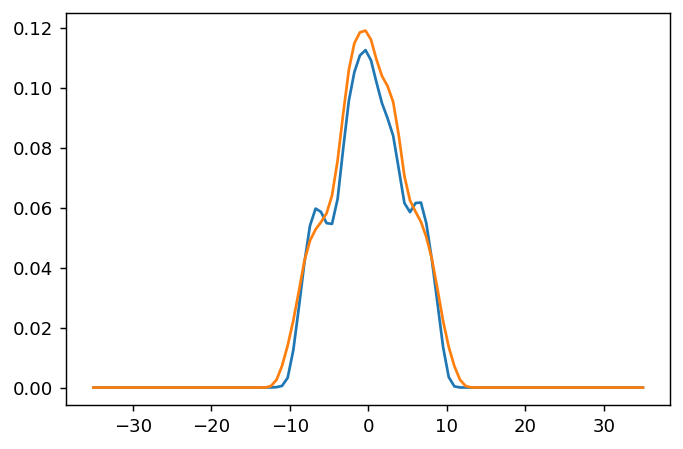

In [50]:
plt.figure(dpi=130)
plt.plot(velocities/1.0e+3, obs.data.sum(dim=(0,1)))
plt.plot(velocities/1.0e+3, img.data.sum(dim=(0,1)))

In [23]:
model.info()

Variable key:              Free/Fixed:   Field:    Min:           Mean:          Max:
  beta                       Free          False    +4.348e+00     +4.348e+00     +4.348e+00
  log_CO                     Free          True     +1.711e+01     +1.739e+01     +2.766e+01
  log_T_in                   Free          False    +1.013e+01     +1.013e+01     +1.013e+01
  log_epsilon                Free          False    -5.117e+00     -5.117e+00     -5.117e+00
  log_v_in                   Free          False    +1.833e+00     +1.833e+00     +1.833e+00
  log_v_inf                  Fixed         False    +9.510e+00     +9.510e+00     +9.510e+00
  log_v_turbulence           Fixed         True     +5.011e+00     +5.011e+00     +5.011e+00
sizes: [7.46717267e+13 7.46169581e+13 7.36127621e+13]
shape: (64, 64, 64)


In [8]:
plot_cube_2D(model['velocity_x'])

KeyError: 'velocity_x'

In [19]:
np.exp(11)

59874.14171519782